In [32]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re

In [45]:
tweets_data_path = 'stanlee.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [34]:
type(tweets_data)

list

In [35]:
print (len(tweets_data))

6134


In [36]:
def word_in_text(word,tweet):
    count=0
    for tweet in tweets_data:
        #tweet['text'].lower()
        match = re.search(word, tweet['text'])
        if match:
            count = count+1   
            #print(tweet['text'])
    return count

In [37]:
stanlee = word_in_text('stanlee', tweet)
stanlee

123

In [38]:
hashtagstanlee = word_in_text('#StanLee', tweet)
hashtagstanlee

816

In [39]:
Stan_Lee = word_in_text('Stan Lee', tweet)
Stan_Lee

3658

In [40]:
STANLEE = word_in_text('STANLEE', tweet)
STANLEE

2

In [41]:
STAN_LEE = word_in_text('STAN LEE', tweet)
STAN_LEE

169

In [42]:
hashtagSTANLEE = word_in_text('STANLEE', tweet)
hashtagSTANLEE

2

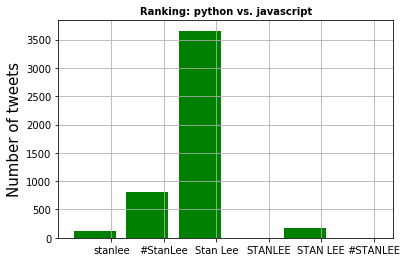

In [43]:
#prg_langs = ['python', 'javascript']
prg_langs = ['stanlee', '#StanLee', 'Stan Lee', 'STANLEE', 'STAN LEE', '#STANLEE']
tweets_by_prg_lang = [stanlee, hashtagstanlee, Stan_Lee, STANLEE, STAN_LEE, hashtagSTANLEE]
#tweets_by_prg_lang = [python, javascriptcounter]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

In [13]:
tweets = pd.DataFrame()

In [24]:
#tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
#tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
#tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)

tweets['text'] = [tweet.get('text','') for tweet in tweets_data]
tweets['lang'] = [tweet.get('lang','') for tweet in tweets_data]

In [25]:
print(tweets)

                                                   text lang  \
0     RT @IndirectaVip: Aún sigo pensando en ti Stan...   es   
1     RT @AvatarTorna: * No soy profeta, pero creo q...   es   
2     Enough said - Stan the man Lee https://t.co/zH...   en   
3     "RIP in Peace Stan Lee" from @MiddleUrinalPod ...   en   
4     RT @SoWizardPodcast: Check out episode 224 of ...   en   
5     RT @comicsandpanels: Stan Lee and Steve Ditko ...   en   
6     RT @mimundoalex: Adios Stan Lee, te inmortaliz...   es   
7     RT @STAY_mutuals: Gain STAY Mutuals!💕🌻\n※ rt a...   en   
8     #StanLeeForever #Remix #EDM #StanLee #marvelco...   en   
9     Stan Lee Inspired Us All: Celebrate His 95 Yea...   en   
10    Stan Lee ganha mural pintado em sua homenagem ...   pt   
11    7/8 Retomamos como homenaje a #StanLee los cas...   es   
12    Now for something breathtaking: A new episode ...   en   
13    RT @BSpodNetwork: Now for something breathtaki...   en   
14    Rap De Stan Lee EN ESPAÑOL || Frik

In [26]:
tweets_by_lang = tweets['lang'].value_counts()

print(tweets_by_lang)

en     3443
es      520
pt      139
und      87
ar       77
th       66
fr       50
in       23
it       22
ja       17
tl       17
ht       12
tr       11
nl        9
cs        3
hi        3
da        2
sl        2
zh        2
pl        2
de        2
sv        2
ca        2
ru        1
ro        1
fa        1
hu        1
et        1
cy        1
Name: lang, dtype: int64


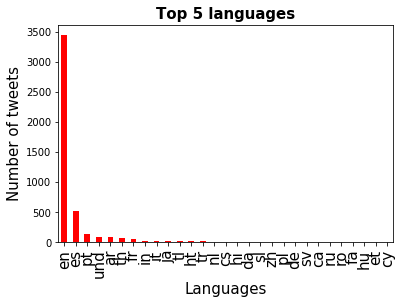

In [27]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
#tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')
tweets_by_lang.plot(ax=ax, kind='bar', color='red')